# Week 12 Problem 1

A few things you should keep in mind when working on assignments:

1. Make sure you fill in any place that says `YOUR CODE HERE`. Do not write your answer in anywhere else other than where it says `YOUR CODE HERE`. Anything you write anywhere else will be removed or overwritten by the autograder.

2. Before you submit your assignment, make sure everything runs as expected. Go to menubar, select *Kernel*, and restart the kernel and run all cells (*Restart & Run all*).

3. Do not change the title (i.e. file name) of this notebook.

4. Make sure that you save your work (in the menubar, select *File* → *Save and CheckPoint*)

5. When you are ready to submit your assignment, go to *Dashboard* → *Assignments* and click the *Submit* button. Your work is not submitted until you click *Submit*.

6. You are allowed to submit an assignment multiple times, but only the most recent submission will be graded.

7. **If your code does not pass the unit tests, it will not pass the autograder.**

## Author: John Nguyen
### Primary Reviewer: Kelechi Ikegwu

# Due Date: 6 PM, April 16, 2018

In [1]:
%matplotlib inline
import networkx as nx
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from nose.tools import (
    assert_equal,
    assert_is_instance,
    assert_almost_equal,
    assert_true,
    assert_is_not
)
from numpy.testing import assert_array_equal

import warnings
warnings.filterwarnings('ignore')

## Question 1

The function <i>make_multigraph()</i> will create an undirected multigraph with $n$ nodes.

In [10]:
def make_multigraph(n):
    '''
    Creates an undirected multigraph with n nodes.
    
    Paramters
    ---------
    n: an Int
    
    Returns
    -------
    mg: A networkx.MultiGraph instance.
    '''
    
    # YOUR CODE HERE
    
    mg = nx.MultiDiGraph()
    mg.add_nodes_from(range(n))
    
    fig, axs = plt.subplots(figsize=(3, 3))
    nx.draw(mg, ax=axs)
    
    return mg

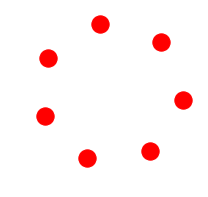

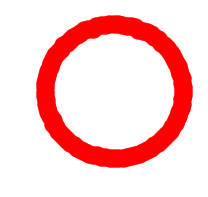

In [11]:
mg0 = make_multigraph(7)
mg1 = make_multigraph(100)

In [12]:
assert_is_instance(mg0, nx.MultiGraph)
nodes = np.array(mg0.nodes())
assert_equal(nodes.size, 7)
assert_equal(nodes.min(), 0)
assert_equal(nodes.max(), 6)
assert_true(np.all(np.diff(nodes) == 1))
assert_equal(len(mg0.edges()), 0)

assert_is_instance(mg1, nx.MultiGraph)
nodes = np.array(mg1.nodes())
assert_equal(nodes.size, 100)
assert_equal(nodes.min(), 0)
assert_equal(nodes.max(), 99)
assert_true(np.all(np.diff(nodes) == 1))
assert_equal(len(mg1.edges()), 0)

# Question 2

Using your result from Problem 1, draw your Multigraph in a circular pattern as shown below.

![prob2_solution](images/p1q2.png)

To pass the assertions, be sure to pass a matplotlib.Axes instance to the _ax_ parameter of the NetworkX draw function.

__Note:__ There are multiple ways to draw the network so you do not have to replicate the graph shown exactly.

In [16]:
def draw_multigraph(mg):
    '''
    Draws a multigraph in circular format.
    
    Paramters
    ---------
    mg: A networkx.MultiGraph instance.
    
    Returns
    -------
    ax: A matplotlib.Axes instance.
    ''' 
    
    # YOUR CODE HERE

    # Draw graph in circular format
    fig, axs = plt.subplots(figsize=(4, 4))
    nx.draw_circular(mg, with_labels=True, ax=axs)
    
    return axs

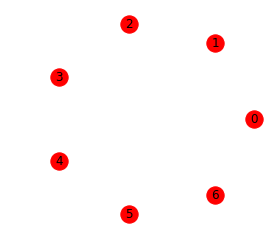

In [17]:
ax2 = draw_multigraph(mg0)

In [18]:
pos = np.array(list(nx.circular_layout(mg0).values()))
assert_is_instance(ax2, mpl.axes.Axes)
assert_equal(len(ax2.collections), 1)
assert_equal(len(ax2.collections[0].get_offsets()), len(mg0.nodes()))

## Question 3

In the notebook you've learned how to represent graphs as an adjacency or incidence matrix. For this problem, given an incidence matrix, create the graph instance and draw it. Again, make sure your function a matplotlib.Axes instance.

You do not have to draw the network as exactly shown below to pass the assertions.

__Hint:__ We recommend using the NetworkX _draw()_ function along with <i>from_numpy_matrix()</i>

__Example:__

`
A = np.matrix([[0,1],[1,0]])
ax = draw_adjacency(A)`

should return the following graph:

![prob2_solution](images/p1q3.png)

In [22]:
def draw_adjacency(mat):
    '''    
    Parameters
    ----------
    matrix: a mumpy.matrix
    
    Returns
    -------
    ax: A matplotlib.Axes instance.
    '''
    # YOUR CODE HERE
    fig, axs = plt.subplots(figsize=(4, 4))
    G = nx.from_numpy_matrix(np.array(mat), create_using=nx.MultiDiGraph())
    pos = nx.circular_layout(G)
    nx.draw_circular(G)
    labels = {i : i + 1 for i in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels, font_size=15)
    plt.show()
    
    return axs

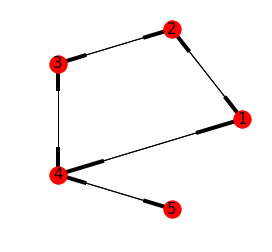

In [23]:
A = np.matrix([[0, 1, 0, 1, 0],
        [1, 0, 1, 0, 0],
        [0, 1, 0, 1, 0],
        [1, 0, 1, 0, 1],
        [0, 0, 0, 1, 0]])
ax3 = draw_adjacency(A)

In [24]:
pos = np.array(list(nx.circular_layout(mg0).values()))
assert_is_instance(ax3, mpl.axes.Axes)
assert_equal(len(ax3.collections[0].get_offsets()), len(A))